# Introduction to Physics-Informed Neural Networks (PINNs) for Solving the Wave Equation

## Overview

In this notebook, we explore the use of **Physics-Informed Neural Networks (PINNs)** to solve the 1D wave equation, a fundamental equation in acoustics and engineering that describes the propagation of waves through a medium. PINNs are a powerful tool that integrate the underlying physical laws governing a system into the training process of a neural network, ensuring that the network's predictions adhere to known physics principles.

## Objectives

The primary objectives of this notebook are:

1. **Introduction to PINNs**: Understand the concept of Physics-Informed Neural Networks and how they differ from traditional data-driven neural networks.
2. **Wave Equation**: Provide an overview of the 1D wave equation and its significance in various applications.
3. **Implementation of PINNs**: Walk through the implementation of a PINN to solve the wave equation, including the network architecture, loss function, and training process.
4. **Hands-on Training**: Train the neural network model on a given dataset and visualize the results.

## Theoretical Background

### What are PINNs?

Physics-Informed Neural Networks (PINNs) incorporate physical laws into the learning process by embedding the governing differential equations into the loss function of the neural network. This approach leverages the knowledge of physics to guide the network's predictions, making it particularly useful for problems where data is scarce or noisy.

### The 1D Wave Equation

The 1D wave equation is a partial differential equation that describes the propagation of waves (such as sound or light waves) through a one-dimensional medium. It is expressed as:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

where:
- $u(x, t)$ is the wave function, representing the displacement at position $x$ and time $t$.
- $c$ is the speed of wave propagation in the medium.

In this notebook, we will solve the wave equation using a PINN approach, where the neural network is trained to approximate the wave function $u(x, t)$ while respecting the physical constraints imposed by the wave equation.

## Structure of the Notebook

1. **Model Architecture**: Define the neural network architecture used in the PINN.
2. **Loss Function and Training**: Discuss the formulation of the loss function, which includes both data-driven losses and physics-based losses derived from the wave equation.
3. **Training Process**: Train the model using a dataset of initial and boundary conditions, and observe the convergence behavior.
4. **Results and Analysis**: Visualize the results and compare the network's predictions with the analytical solution of the wave equation.

## Prerequisites

To fully benefit from this notebook, you should be familiar with the following concepts:
- Basic understanding of neural networks and deep learning.
- Fundamental concepts of differential equations, particularly the wave equation.
- Familiarity with Python programming and libraries such as TensorFlow.


## Importing Required Libraries

To get started, we need to import several essential libraries that will be used throughout the notebook:

1. **TensorFlow**: A powerful open-source platform for machine learning developed by Google. We use TensorFlow to define, train, and evaluate our Physics-Informed Neural Network (PINN) model.

2. **NumPy**: A fundamental package for numerical computing in Python. It provides support for arrays, mathematical functions, and operations on arrays. NumPy is used here for handling numerical data and performing mathematical computations.

3. **Matplotlib**: A widely-used plotting library for Python. It allows us to create a wide range of static, animated, and interactive plots. In this notebook, Matplotlib will be used to visualize data, including the model's predictions and the comparison with analytical solutions.

4. **os**: A standard Python library for interacting with the operating system. We use the `os` module to manage files and directories, such as saving and loading model checkpoints, creating directories, and handling file paths.

These libraries form the core of our computational and visualization toolkit for building and analyzing the PINN model for solving the 1D wave equation.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

## Problem Definition: The 1D Wave Equation

In this section, we define the parameters for the 1D wave equation, which describes the propagation of waves (such as sound waves, light waves, or vibrations) through a medium. The wave equation is a fundamental partial differential equation (PDE) in physics and engineering. Our objective is to solve this equation using a Physics-Informed Neural Network (PINN), leveraging neural networks to approximate the solution while adhering to the physical laws encapsulated by the PDE.

### Parameters of the Problem

- **Length of the String (L)**: This parameter represents the length of the medium (e.g., a string or a rod) through which the wave propagates. For our problem, we set $ L = 1.0 $, which means the length of the string is 1 unit.

- **Wave Speed (c)**: The wave speed denotes the speed at which the wave travels through the medium. In this scenario, we assume the wave speed $ c = 1.0 $ unit per time step. The value of $ c $ is crucial as it determines how fast the wave propagates along the string.

- **Amplitude of Initial Displacement (A)**: The initial displacement amplitude is the maximum displacement from the equilibrium position at the initial time $ t = 0 $. Here, we set the amplitude $ A = 0.1 $. This initial condition defines how much the string is displaced initially, setting the initial shape and energy of the wave.

- **Total Time Duration (T)**: The total time duration specifies the period over which we want to observe and solve the wave equation. For our problem, we consider a total time $ T = 1.0 $ unit. This parameter helps define the temporal domain over which we compute the wave propagation.

### The 1D Wave Equation

The 1D wave equation we aim to solve is given by:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

where:
- $ u(x, t) $ represents the wave function, describing the displacement of the string at position $ x $ and time $ t $.
- The initial conditions are defined by the amplitude $ A $ and the shape of the initial displacement.

The goal is to use a PINN to approximate the solution $ u(x, t) $ over the spatial domain $ x \in [0, L] $ and temporal domain $ t \in [0, T] $, ensuring that the solution respects the physical constraints imposed by the wave equation.

By defining these parameters, we set up the physical context of the problem, providing a clear foundation for the subsequent implementation and training of the PINN model.

In [2]:
# Define the problem parameters
L = 1.0     # Length of the string
c = 1.0     # Wave speed
A = 0.1     # Amplitude of the initial displacement
T = 1.0     # Total time duration

### Initial Condition and Analytical Solution

---

To set the stage for solving the 1D wave equation, we first define the initial condition of the problem, which represents the displacement of the wave at the starting time $ t = 0 $. The initial displacement of the string is given by the function:

$$ u_{\text{initial}} = A \sin\left(\frac{\pi x_{\text{ic}}}{L}\right)$$

where:
- $A$ is the amplitude of the initial displacement, representing the maximum displacement from the equilibrium position.
- $x_{\text{ic}}$ are points along the string.
- $L$ is the total length of the string.

This sinusoidal function describes the shape of the string at $t = 0$, starting from the equilibrium and reaching a maximum displacement $A$ in the middle of the string.

Additionally, the problem admits a known analytical solution, which serves as a benchmark for evaluating the accuracy of the Physics-Informed Neural Network (PINN). The analytical solution, which describes the displacement of the string at any position $x$ and time $t$, is given by:

$$
u(x, t) = A \sin\left(\frac{\pi x}{L}\right) \cos\left(\frac{\pi c t}{L}\right)
$$


Here:
- $\omega = \frac{\pi c}{L}$ is the angular frequency of the wave, determined by the wave speed $c$ and the length of the string $L$.
- The function combines a spatial sine wave with a temporal cosine oscillation, describing how the initial displacement $u_{\text{initial}}$ evolves over time.

The analytical solution provides a precise and accurate description of the wave's behavior, which we can use to validate the PINN's predictions. By comparing the neural network's output with this solution, we can assess how well the PINN captures the underlying physics of the wave equation.

In [3]:
# Initial condition at t=0
xx_ic = np.linspace(0, 1, 100)
u_initial = A * np.sin(np.pi * xx_ic / L)

Text(0.5, 1.0, 'Initial condition')

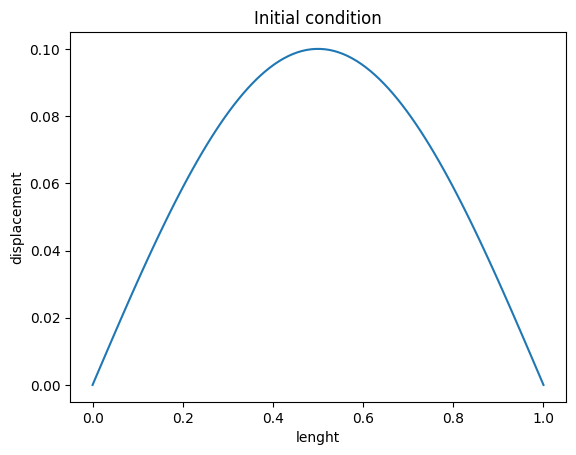

In [4]:
plt.figure()
plt.plot(xx_ic, u_initial)
plt.xlabel("lenght")
plt.ylabel("displacement")
plt.title("Initial condition")

In [5]:
# Define the analytical solution for comparison
def analytical_solution(x, t, L, c, A):
    omega = np.pi * c / L
    return A * np.sin(np.pi * x / L) * np.cos(omega * t)

### Neural Network Architecture

---

In this section, we define the architecture of the Physics-Informed Neural Network (PINN) used to solve the 1D wave equation. The PINN is a feedforward neural network that takes as input the spatial and temporal coordinates and outputs the predicted wave function values. The network's architecture, consisting of several fully connected layers, is designed to learn the complex mapping between the input coordinates and the wave function, while also satisfying the physical constraints imposed by the wave equation.

#### Defining the PINN Class

The neural network is implemented as a subclass of `tf.keras.Model`, a standard approach in TensorFlow for creating custom models. Here's the breakdown of the class definition:

```python
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense4 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense5 = tf.keras.layers.Dense(1, activation=None)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.dense5(x)

# Create an instance of the PINN model
model = PINN()
```

- **`__init__` Method**: The constructor initializes the network's layers. The model consists of five fully connected (dense) layers:
  - The first four layers (`dense1` to `dense4`) have 50 neurons each and use the hyperbolic tangent (`tanh`) activation function. The `tanh` function is chosen for its ability to capture non-linear relationships.
  - The final layer (`dense5`) outputs a single value and does not apply any activation function, as the output represents the scalar wave function value at given spatial and temporal coordinates.

- **`call` Method**: This method defines the forward pass of the network. It takes an input tensor `inputs`, which consists of the spatial and temporal coordinates, and propagates it through the network layers. The output of each layer serves as the input to the next layer, with the final layer producing the predicted wave function value.

The instance `model = PINN()` creates an object of the `PINN` class, initializing the network and preparing it for training. The network's architecture is specifically designed to approximate the solution of the wave equation while incorporating the physical constraints into the learning process, enabling the model to generalize well even with limited data.

In [6]:
# Define the neural network architecture
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense4 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense5 = tf.keras.layers.Dense(1, activation=None)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.dense5(x)

# Create an instance of the PINN model
model = PINN()

### Loss Functions for Physics-Informed Neural Network (PINN)

---

In this section, we define the loss functions used to train the Physics-Informed Neural Network (PINN) for solving the 1D wave equation. The loss functions are crucial as they guide the network to learn the correct physical behavior of the system. In PINNs, the loss functions are designed to incorporate both the data-driven aspects (such as initial and boundary conditions) and the underlying physical laws (such as the governing partial differential equations).

#### 1. Loss Function for PDE Residual (`loss_pde`)

The `loss_pde` function quantifies how well the neural network satisfies the wave equation. The PDE residual is computed by taking the second-order derivatives of the network's output with respect to space and time and ensuring that they match the equation's requirements.

```python
def loss_pde(x, t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([x, t])
        u = model(tf.concat([x, t], axis=1))
        u_x = tape.gradient(u, x)
        u_t = tape.gradient(u, t)
    u_xx = tape.gradient(u_x, x)
    u_tt = tape.gradient(u_t, t)
    del tape
    return tf.reduce_mean((u_tt - c**2 * u_xx)**2)
```

- **Gradient Calculation**: The `tf.GradientTape` context is used to compute the gradients of the neural network's output $ u $ with respect to the input variables $ x $ and $ t $. This involves:
  - Calculating the first derivatives $ u_x $ and $ u_t $.
  - Computing the second derivatives $ u_{xx} $ and $ u_{tt} $.

- **PDE Residual**: The difference between the left-hand side and right-hand side of the wave equation $ u_{tt} - c^2 u_{xx} $ is calculated, and the mean squared error of this residual is minimized. This ensures the network's output respects the wave equation.

#### 2. Loss Function for Boundary Conditions (`loss_bc`)

The `loss_bc` function enforces the boundary conditions, ensuring that the wave displacement at the boundaries of the domain is correctly modeled.

```python
def loss_bc(x, t):
    u_pred = model(tf.concat([x, t], axis=1))
    return tf.reduce_mean(u_pred**2)
```

- **Boundary Condition Enforcement**: The function calculates the model's predicted wave displacement $ u_{\text{pred}} $ at the boundary points and minimizes the mean squared error of these values. This typically ensures that the wave displacement is zero at the boundaries (e.g., fixed ends of a string).

#### 3. Loss Function for Initial Conditions (`loss_ic`)

The `loss_ic` function enforces the initial conditions, ensuring that the network correctly models the wave's initial displacement and velocity.

```python
def loss_ic(x, t, u_initial):
    u_pred = model(tf.concat([x, t], axis=1))
    return tf.reduce_mean((u_pred - u_initial)**2)
```

- **Initial Condition Enforcement**: This function compares the model's predictions $ u_{\text{pred}} $ with the known initial displacement $ u_{\text{initial}} $. The mean squared error between these values is minimized, ensuring the model starts with the correct initial conditions.

### Combined Loss for Training

The overall loss function used to train the PINN is a combination of the above loss components, ensuring that the network's predictions satisfy the wave equation, boundary conditions, and initial conditions. This holistic approach allows the model to learn not only from data but also directly from the governing physical laws.

In [7]:
# Define the loss function components
def loss_pde(x, t):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([x, t])
        u = model(tf.concat([x, t], axis=1))
        u_x = tape.gradient(u, x)
        u_t = tape.gradient(u, t)
    u_xx = tape.gradient(u_x, x)
    u_tt = tape.gradient(u_t, t)
    del tape
    return tf.reduce_mean((u_tt - c**2 * u_xx)**2)

def loss_bc(x, t):
    u_pred = model(tf.concat([x, t], axis=1))
    return tf.reduce_mean(u_pred**2)

def loss_ic(x, t, u_initial):
    u_pred = model(tf.concat([x, t], axis=1))
    return tf.reduce_mean((u_pred - u_initial)**2)

### Generating Training Data

---

To train the Physics-Informed Neural Network (PINN), we need to generate training data that includes samples from the domain of interest along with corresponding initial and boundary conditions. This data helps the network learn the underlying solution to the wave equation while adhering to the physical constraints.

#### Random Sampling of Domain Points

We randomly sample points within the spatial and temporal domains to form the training dataset:

```python
n_train = 1000
x_train = np.random.rand(n_train, 1) * L
t_train = np.random.rand(n_train, 1) * T
```

- **`n_train = 1000`**: Specifies the number of training data points.
- **`x_train`**: Randomly sampled positions along the string, ranging from 0 to $L$.
- **`t_train`**: Randomly sampled time instances, ranging from 0 to $T$.

#### Initial Condition at $t = 0$

To enforce the initial condition, we sample points along the string at $t = 0$ and compute the initial displacement using the specified amplitude $A$ and the initial displacement formula:

```python
x_ic = np.random.rand(n_train, 1) * L
t_ic = np.zeros((n_train, 1))
u_initial = A * np.sin(\frac{\pi x_{\text{ic}}}{L})
```

- **`x_ic`**: Random positions along the string.
- **`t_ic` = 0**: All initial condition samples are at the starting time.
- **`u_initial`**: The initial displacement computed using the function $u_{\text{initial}} = A \sin\left(\frac{\pi x_{\text{ic}}}{L}\right)$.

#### Boundary Condition at $x = 0$ and $x = L$

We also sample points to enforce boundary conditions, ensuring the wave function meets the required conditions at the endpoints of the string:

```python
t_bc = np.random.rand(n_train, 1) * T
x_bc_0 = np.zeros((n_train, 1))
x_bc_L = L * np.ones((n_train, 1))
```

- **`t_bc`**: Random time instances, ensuring boundary conditions are applied over the entire temporal domain.
- **`x_bc_0` = 0**: All samples for the boundary condition at the left end of the string.
- **`x_bc_L` = L**: All samples for the boundary condition at the right end of the string.

#### Conversion to TensorFlow Tensors

To use these data points in the neural network training process, we convert them into TensorFlow tensors:

```python
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
t_train = tf.convert_to_tensor(t_train, dtype=tf.float32)
x_ic = tf.convert_to_tensor(x_ic, dtype=tf.float32)
t_ic = tf.convert_to_tensor(t_ic, dtype=tf.float32)
u_initial = tf.convert_to_tensor(u_initial, dtype=tf.float32)
x_bc_0 = tf.convert_to_tensor(x_bc_0, dtype=tf.float32)
x_bc_L = tf.convert_to_tensor(x_bc_L, dtype=tf.float32)
t_bc = tf.convert_to_tensor(t_bc, dtype=tf.float32)
```

These tensors form the input data for training the PINN model, providing the network with the necessary information to learn the solution to the wave equation under the given initial and boundary conditions.

In [8]:
# Generate training data
n_train = 1000
x_train = np.random.rand(n_train, 1) * L
t_train = np.random.rand(n_train, 1) * T

# Initial condition at t=0
x_ic = np.random.rand(n_train, 1) * L
t_ic = np.zeros((n_train, 1))
u_initial = A * np.sin(np.pi * x_ic / L)

# Boundary condition at x=0 and x=L
t_bc = np.random.rand(n_train, 1) * T
x_bc_0 = np.zeros((n_train, 1))
x_bc_L = L * np.ones((n_train, 1))

# Convert data to TensorFlow tensors
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
t_train = tf.convert_to_tensor(t_train, dtype=tf.float32)
x_ic = tf.convert_to_tensor(x_ic, dtype=tf.float32)
t_ic = tf.convert_to_tensor(t_ic, dtype=tf.float32)
u_initial = tf.convert_to_tensor(u_initial, dtype=tf.float32)
x_bc_0 = tf.convert_to_tensor(x_bc_0, dtype=tf.float32)
x_bc_L = tf.convert_to_tensor(x_bc_L, dtype=tf.float32)
t_bc = tf.convert_to_tensor(t_bc, dtype=tf.float32)

### Optimizer and Checkpointing

---

In this section, we set up the optimization and checkpointing mechanisms for training the Physics-Informed Neural Network (PINN). These components are crucial for efficiently training the model and preserving progress, especially in long training sessions.

#### Optimizer

```python
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
```

- **Adam Optimizer**: We use the Adam optimizer, a popular choice for training deep learning models due to its adaptive learning rate capabilities and efficiency. The learning rate is set to 0.001, which determines the step size during the gradient descent process.

#### Checkpointing

Checkpointing is an essential feature that saves the model's state during training. It allows you to resume training from the last saved state in case of interruptions or to continue refining the model in subsequent sessions.

```python
checkpoint_dir = './checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "pinn_ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)
manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
```

- **`checkpoint_dir`**: Specifies the directory where the checkpoint files will be saved. We store the checkpoints in the `./checkpoints` directory.
- **`checkpoint_prefix`**: Sets a prefix for the checkpoint files, making them easily identifiable.
- **`tf.train.Checkpoint`**: This TensorFlow class creates checkpoint objects that store the state of the optimizer and the model. It allows saving and restoring the model and optimizer states.
- **`tf.train.CheckpointManager`**: Manages the checkpoint files, allowing you to specify how many checkpoints to keep. In this case, we keep the three most recent checkpoints.

#### Restoring from Checkpoints

Before starting the training process, we check if there are existing checkpoints and restore the latest one if available:

```python
if manager.latest_checkpoint:
    checkpoint.restore(manager.latest_checkpoint).expect_partial()
    print(f"Restored from {manager.latest_checkpoint}")
else:
    print("No checkpoint found. Starting training from scratch.")
```

- **Restoring Checkpoints**: The `restore` method loads the model and optimizer states from the latest checkpoint if available. This allows us to resume training from the last saved state.
- **Starting from Scratch**: If no checkpoint is found, the training starts from scratch, initializing the model weights randomly.

Using checkpointing ensures that we do not lose progress during training and can experiment with different hyperparameters or model architectures without worrying about starting from the beginning each time.

In [9]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Checkpointing
checkpoint_dir = './checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "pinn_ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)
manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)

# Restore the latest checkpoint if available
if manager.latest_checkpoint:
    checkpoint.restore(manager.latest_checkpoint).expect_partial()
    print(f"Restored from {manager.latest_checkpoint}")
else:
    print("No checkpoint found. Starting training from scratch.")

No checkpoint found. Starting training from scratch.


### Training Loop

---

In this final section, we implement the training loop for the Physics-Informed Neural Network (PINN). The training loop iteratively updates the model's weights to minimize the combined loss function, which includes the PDE residual, initial condition, and boundary condition losses. The optimizer is used to adjust the weights based on the computed gradients.

#### Training Parameters

```python
epochs = 100000
```

- **Epochs**: The number of training epochs is set to 100,000. An epoch is a complete pass through the entire training dataset. The choice of epochs can vary depending on the convergence behavior of the model.

#### The Training Process

```python
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_pde(x_train, t_train) + \
               loss_ic(x_ic, t_ic, u_initial) + \
               loss_bc(x_bc_0, t_bc) + \
               loss_bc(x_bc_L, t_bc)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
```

- **Gradient Tape**: We use TensorFlow's `tf.GradientTape` to record operations for automatic differentiation. Within this context, we calculate the combined loss, which is the sum of:
  - `loss_pde(x_train, t_train)`: Ensures the network output satisfies the PDE.
  - `loss_ic(x_ic, t_ic, u_initial)`: Enforces the initial condition.
  - `loss_bc(x_bc_0, t_bc)` and `loss_bc(x_bc_L, t_bc)`: Enforce boundary conditions at the left and right ends of the string, respectively.

- **Gradient Calculation and Application**: The gradients of the loss with respect to the model's trainable variables (weights and biases) are calculated using `tape.gradient`. These gradients are then applied to the model using the optimizer's `apply_gradients` method, which updates the model's parameters to minimize the loss.

#### Monitoring and Checkpointing

```python
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")
        manager.save()
        print("Checkpoint saved at epoch {}".format(epoch))
```

- **Periodic Logging**: Every 10,000 epochs, the current loss value is printed to monitor the training progress. This helps in assessing how well the model is learning the underlying physical behavior and whether the loss is converging.

- **Checkpoint Saving**: The model's state is saved periodically using `manager.save()`, ensuring that the training progress is preserved. This allows resuming from these checkpoints in future sessions, avoiding the need to restart from scratch.

### Conclusion

The training loop is the core component where the neural network learns to approximate the solution to the wave equation. By iteratively adjusting the model's parameters to minimize the combined loss, the PINN becomes capable of accurately predicting wave dynamics under the given initial and boundary conditions. This iterative process, combined with checkpointing, ensures that the training is efficient and resilient to interruptions.

In [ ]:
# Training loop
epochs = 100000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_pde(x_train, t_train) + \
               loss_ic(x_ic, t_ic, u_initial) + \
               loss_bc(x_bc_0, t_bc) + \
               loss_bc(x_bc_L, t_bc)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}")
        manager.save()
        print("Checkpoint saved at epoch {}".format(epoch))